In [2]:
!pip install opencv-python

In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=153edb7876d758529948883c63e4a79b8a64e5875fd5f82191dc3cba86368edc
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [4]:
import os
import face_recognition
from google.colab import drive
from imutils import paths
import re

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the folder containing images
images_folder = '/content/drive/MyDrive/images'  # Replace with your actual folder path

# Get a list of image paths
image_paths = list(paths.list_images(images_folder))

# Load your image
image_to_be_matched_path = '/content/drive/MyDrive/test/warren.jpg'  # Replace with your actual image path
image_to_be_matched = face_recognition.load_image_file(image_to_be_matched_path)

# Encode the loaded image into a feature vector
image_to_be_matched_encoded = face_recognition.face_encodings(image_to_be_matched)[0]

# Iterate over each image in the folder
for image_path in image_paths:
    # Load the current image
    current_image = face_recognition.load_image_file(image_path)

    # Encode the loaded image into a feature vector
    current_image_encoded = face_recognition.face_encodings(current_image)
    print(current_image_encoded)
    # Check if any face was found in the current image
    if not current_image_encoded:
        print(f"No face found in {image_path}")
        continue

    current_image_encoded = current_image_encoded[0]

    # Match your image with the current image and check if it matches
    result = face_recognition.compare_faces(
        [image_to_be_matched_encoded], current_image_encoded
    )

    img = re.sub(r'^.*images/|_|\.jpg$', ' ', image_path)
    # Example image_path
      #image_path = '/content/drive/MyDrive/your_folder/image1.jpg'
    # Check if it was a match
    if result[0] == True:
        print(f"Matched: {img}")
    else:
        print(f"Not matched: {img}")



Mounted at /content/drive
Not matched:  barack obama 
Not matched:  bill gates 
Not matched:  jeff bezos 
Not matched:  mark zuckerberg 
Not matched:  ray dalio 
Not matched:  shah rukh khan 
Matched:  warren buffett 


['barack_obama', 'bill_gates', 'jeff_bezos', 'mark_zuckerberg', 'ray_dalio', 'shah_rukh_khan', 'warren_buffett']
Processing warren.jpg
[0.79822468 0.63864491 0.766556   0.85043217 0.73931058 0.82540736
 0.29842445]


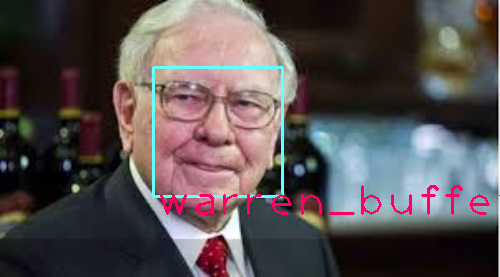

In [5]:
import face_recognition   ##Detecting and recogniting faces
import cv2     ## intracting with images
import os       ## For Reading the file name
from google.colab.patches import cv2_imshow ## we are importing cv2_imshow from google.colab.patches because google colab doesn't support cv2.imshow() funciton.

image_paths = list(paths.list_images(images_folder))


def read_img(path): #path= single img from directory
   img = cv2.imread(path) ## reading image,image will be stored in metrics form
   (h,w) = img.shape[:2]  ## fetching height and width
   #resizing
   width = 500            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image


known_encodings = []
known_names = []
known_dir = '/content/drive/MyDrive/images' ##Known directory path
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])
print(known_names) ## Printing all the known labels



unknown_dir = '/content/drive/MyDrive/test' ##UNknown Images Directory
for file in os.listdir(unknown_dir): #for each img in unknown directory
 print("Processing",file)
 img = read_img(unknown_dir + '/' + file)##reading images
 img_enc = face_recognition.face_encodings(img)[0]##Encodings
 results = face_recognition.compare_faces(known_encodings,img_enc)
 ##Comparing Known Encodings with Unknown encoding
 print(face_recognition.face_distance(known_encodings,img_enc))
 ## Printing Face Distances
 res = [i for i, val in enumerate(results) if val]
 name = known_names[res[0]]

 '''
Drawing a rectangle box around the faces of unknown images using  face_locations function in library
'''
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 ##Drawing Rectangle
 cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) ##Putting labels(names) on the rectangle
 cv2_imshow(img) ##showing images